In [ ]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras import layers, callbacks
import keras.models

from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten, Input
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import Model


C:\Users\PF3AF\miniconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.4 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:


path = "DATASET/Dataset wajah/UTKFace"
save_dir = os.path.join(os.getcwd(), 'umur_gender_simpan_model')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_name = 'umur_gender_model.keras'
model_path = os.path.join(save_dir, model_name)
pixels = []
age = []
gender = []
for img in os.listdir(path):
    ages = img.split("_")[0]
    genders = img.split("_")[1]
    img = cv2.imread(str(path)+"/"+str(img))
    img = cv2.resize(img, dsize=(64, 64))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pixels.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))
age = np.array(age,dtype=np.int64)
pixels = np.array(pixels)
gender = np.array(gender,np.uint64)




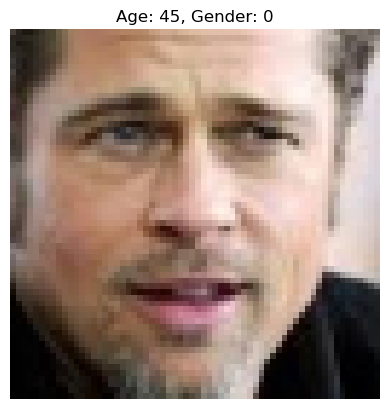

In [ ]:
#tampilkan hasil gambar yang sudah di risize  dalam bentuk citra

import matplotlib.pyplot as plt
import random

# Display a random image from the resized dataset
random_index = random.randint(0, len(pixels) - 1)
plt.imshow(pixels[random_index])
plt.title(f"Age: {age[random_index]}, Gender: {gender[random_index]}")
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(pixels,age,random_state=100)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(pixels,gender,random_state=100)


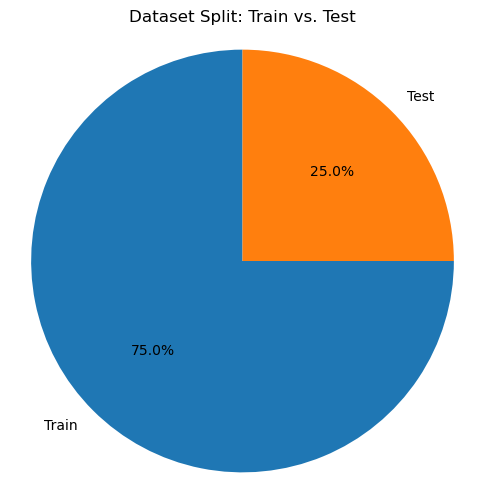

In [ ]:
#buat pie chart berdasarkan split dataset anatara train dan test

import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Train', 'Test']
sizes = [len(x_train), len(x_test)]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Dataset Split: Train vs. Test')
plt.axis('equal')
plt.show()

In [ ]:

input = Input(shape=(64,64, 3))
conv1 = Conv2D(140,(3,3),activation="relu")(input)
conv2 = Conv2D(130,(3,3),activation="relu")(conv1)
batch1 = BatchNormalization()(conv2)
pool3 = MaxPool2D((2,2))(batch1)
conv3 = Conv2D(120,(3,3),activation="relu")(pool3)
batch2 = BatchNormalization()(conv3)
pool4 = MaxPool2D((2,2))(batch2)
flt = Flatten()(pool4)
#age
age_l = Dense(128,activation="relu")(flt)
age_l = Dense(64,activation="relu")(age_l)
age_l = Dense(32,activation="relu")(age_l)
age_l = Dense(1,activation="relu")(age_l)
#gender
gender_l = Dense(128,activation="relu")(flt)
gender_l = Dense(80,activation="relu")(gender_l)
gender_l = Dense(64,activation="relu")(gender_l)
gender_l = Dense(32,activation="relu")(gender_l)
gender_l = Dropout(0.5)(gender_l)
gender_l = Dense(2,activation="softmax")(gender_l)

model = Model(inputs=input,outputs=[age_l,gender_l])
model.compile(optimizer="adam",loss=["mse","sparse_categorical_crossentropy"],metrics=['mae','accuracy'])


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 62, 62, 140)       │           3,920 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 60, 60, 130)       │         163,930 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 60, 60, 130)       │             520 │ conv2d_4[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 30, 30, 130)       │               0 │ batch_normalization_2[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 28, 28, 120)       │         140,520 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 28, 28, 120)       │             480 │ conv2d_5[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 14, 14, 120)       │               0 │ batch_normalization_3[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 23520)             │               0 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 128)               │       3,010,688 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 80)                │          10,320 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 128)               │       3,010,688 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 64)                │           5,184 │ dense_14[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 64)                │           8,256 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 32)                │           2,080 │ dense_15[0][0]             │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 6,358,765 (24.26 MB)

 Trainable params: 6,358,265 (24.25 MB)

 Non-trainable params: 500 (1.95 KB)

In [ ]:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

checkpoint = ModelCheckpoint(
        filepath= save_dir + "/model-{epoch:02d}-{val_loss:.2f}.keras",
        monitor='val_loss',
        verbose=1,
        save_best_only=True,

        save_freq='epoch'
)

h = save = model.fit(x_train,[y_train,y_train_2],
    validation_data=(x_test,[y_test,y_test_2]),
    epochs=20,
    batch_size=16,
    callbacks=[early_stopping,checkpoint])

Epoch 1/20
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - dense_12_loss: 270.5784 - dense_12_mae: 12.0558 - dense_17_accuracy: 0.7108 - dense_17_loss: 0.6336 - loss: 271.2120
Epoch 1: val_loss improved from inf to 154.10347, saving model to C:\Users\PF3AF\umur_gender_simpan_model/model-01-154.10.keras
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 836s 747ms/step - dense_12_loss: 270.5093 - dense_12_mae: 12.0541 - dense_17_accuracy: 0.7109 - dense_17_loss: 0.6335 - loss: 271.1428 - val_dense_12_loss: 153.6550 - val_dense_12_mae: 8.8712 - val_dense_17_accuracy: 0.8569 - val_dense_17_loss: 0.3219 - val_loss: 154.1035
Epoch 2/20
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - dense_12_loss: 106.1602 - dense_12_mae: 7.5465 - dense_17_accuracy: 0.8645 - dense_17_loss: 0.3304 - loss: 106.4906
Epoch 2: val_loss did not improve from 154.10347
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 830s 746ms/step - dense_12_loss: 106.1581 - dense_12_mae: 7.5464 - dense_17_accuracy: 0.8645 - dense_17_loss: 0.3304 - loss: 106.4885 - val

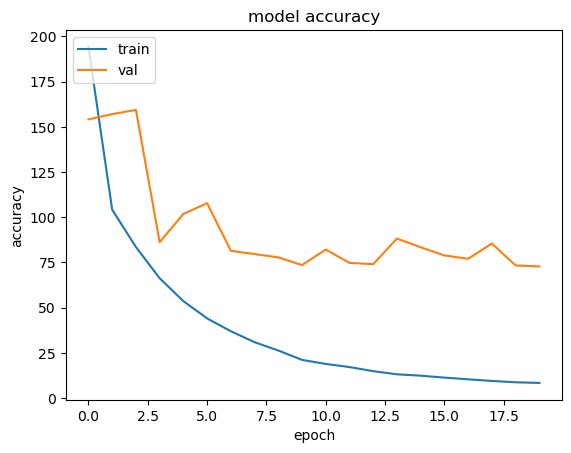

In [ ]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, age_loss, gender_loss, age_mae, gender_accuracy = model.evaluate(x_test, [y_test, y_test_2], verbose=0)

print(f"Overall Loss: {loss}")
print(f"Age Loss (MSE): {age_loss}")
print(f"Gender Loss: {gender_loss}")
print(f"Age MAE: {age_mae}")
print(f"Gender Accuracy: {gender_accuracy}")

Overall Loss: 72.8075942993164
Age Loss (MSE): 71.55188751220703
Gender Loss: 1.0516726970672607
Age MAE: 5.961696147918701
Gender Accuracy: 0.8967437148094177


In [ ]:
model.save(model_path)


186/186 ━━━━━━━━━━━━━━━━━━━━ 65s 351ms/step


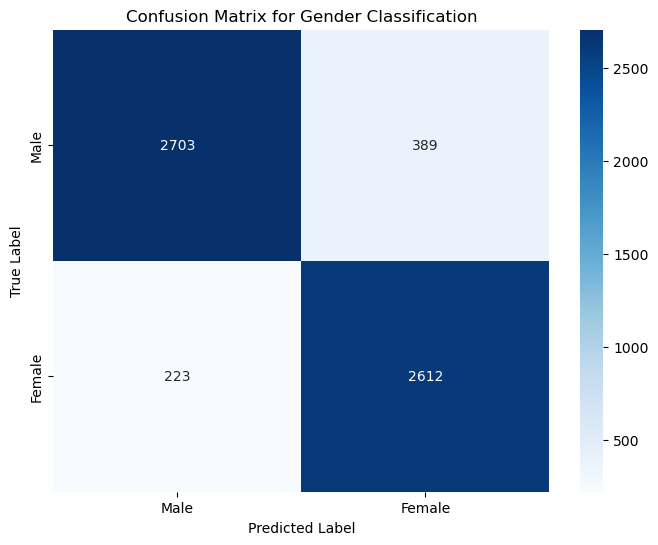

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

#
y_pred_gender = model.predict(x_test)[1].argmax(axis=1)


cm = confusion_matrix(y_test_2, y_pred_gender)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female']) # Replace with actual class labels
plt.title("Confusion Matrix for Gender Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Deteksi lewat gambar**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[array([[20.520851]], dtype=float32), array([[46.612656]], dtype=float32)] [1, 0]


C:\Users\PF3AF\AppData\Local\Temp\ipykernel_21416\3744785322.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.putText(pic,"UMUR: "+str(int(predict[0]))+" "+str(gend),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX, 2,col,5)


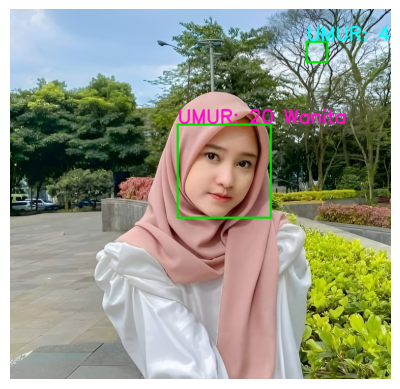

False

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2

# Load age and gender model
model_path = "umur_gender_simpan_model/umur_gender_model.keras"
model = load_model(model_path)
output_path = "hasil/jepret.jpg"
img_path = "test10 (1).jpg"
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
pic = cv2.imread(img_path)

# Deteksi wajah
faces = face_cascade.detectMultiScale(pic, scaleFactor=1.11, minNeighbors=8)
age_ = []
gender_ = []

for (x, y, w, h) in faces:
    img = pic[y:y + h, x:x + w]
    img = cv2.resize(img, (64, 64))
    predict = model.predict(np.array(img).reshape(-1, 64, 64, 3))
    age_.append(predict[0])
    gender_.append(np.argmax(predict[1]))

    gend = 'Pria' if np.argmax(predict[1]) == 0 else 'Wanita'
    col = (255, 255, 0) if gend == 'Pria' else (203, 12, 255)

    # Draw rectangle
    cv2.rectangle(pic, (x, y), (x + w, y + h), (0, 225, 0), 5)
    # The following line was incorrectly indented.
    # It should be aligned with the previous statement inside the loop.
    cv2.putText(pic,"UMUR: "+str(int(predict[0]))+" "+str(gend),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX, 2,col,5)
# Convert color and display
pic1 = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
print(age_, gender_)
plt.imshow(pic1)
plt.axis('off')
plt.show()

# Save output
cv2.imwrite(output_path, pic)

# **Deteksi lewat kamera**

In [ ]:

import cv2
import numpy as np
from keras.models import load_model
import cv2
model_path = "umur_gender_simpan_model/umur_gender_model.keras"
model = load_model(model_path)

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

age_ = []
gender_ = []

image_size = 64

camera = cv2.VideoCapture(0)

while True:

        ret, frame = camera.read()
        faces = face_cascade.detectMultiScale(frame,scaleFactor=1.11, minNeighbors=8)

        for (x,y,w,h) in faces:
          img = frame[y:y + h, x:x + w]
          img = cv2.resize(img,(image_size,image_size))
          predict = model.predict(np.array(img).reshape(-1,image_size,image_size,3))
          age_.append(predict[0])
          gender_.append(np.argmax(predict[1]))
          gend = np.argmax(predict[1])
          if gend == 0:
            gend = 'Man'
            col = (255,255,0)
          else:
            gend = 'Woman'
            col = (203,12,255)
          cv2.rectangle(frame,(x,y),(x+w,y+h),(0,225,0),1)
          cv2.putText(frame,"Age:"+str(int(predict[0]))+"/"+str(gend),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,w*0.005,col,1)
        cv2.imshow("camera",frame)

        key = cv2.waitKey(10)

        if key == 27:
            cv2.destroyAllWindows()
            break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


C:\Users\PF3AF\AppData\Local\Temp\ipykernel_21468\3272006454.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.putText(frame,"Age:"+str(int(predict[0]))+"/"+str(gend),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,w*0.005,col,1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 